In [1]:
RANDOM_SEED = 42

In [2]:
import pickle
import pathlib

import numpy as np
import pandas as pd

In [3]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Untitled/projeto1-ml-ames/data


In [4]:
clean_data_path = DATA_DIR / 'processed' / 'ames_eng.pkl'
clean_data_path

PosixPath('/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Untitled/projeto1-ml-ames/data/processed/ames_eng.pkl')

In [5]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      1155 non-null   category
 1   MS.Zoning        1155 non-null   category
 2   Lot.Frontage     1155 non-null   float64 
 3   Lot.Area         1155 non-null   float64 
 4   Lot.Shape        1155 non-null   category
 5   Land.Contour     1155 non-null   category
 6   Lot.Config       1155 non-null   category
 7   Land.Slope       1155 non-null   category
 8   Neighborhood     1155 non-null   category
 9   Bldg.Type        1155 non-null   category
 10  House.Style      1155 non-null   category
 11  Overall.Qual     1155 non-null   category
 12  Overall.Cond     1155 non-null   category
 13  Roof.Style       1155 non-null   category
 14  Mas.Vnr.Type     1155 non-null   category
 15  Mas.Vnr.Area     1155 non-null   float64 
 16  Exter.Qual       1155 non-null   category
 17  

In [7]:
model_data = data.copy()
model_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,10.366278,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
2,20,RL,81.0,9.565704,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
5,60,RL,78.0,9.208138,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.291147,Norm,False,False,VinylSd,12.0,12.0,12.0
15,60,RL,47.0,10.887512,IR2,HLS,CulDSac,Mod,StoneBr,1Fam,...,GroupedWD,Normal,5.730782,Norm,False,False,CemntBd,7.0,7.0,7.0
17,20,RL,88.0,9.340842,Reg,Lvl,Corner,Gtl,StoneBr,1Fam,...,New,Partial,5.595972,Norm,False,False,VinylSd,0.0,0.0,0.0


In [8]:
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

In [9]:
numerical_data = data.select_dtypes('number').drop(columns='SalePrice').copy()
target = data['SalePrice'].copy()
numerical_data.corrwith(target).sort_values()



ordinal_columns

['Lot.Shape',
 'Land.Slope',
 'Overall.Qual',
 'Overall.Cond',
 'Exter.Qual',
 'Exter.Cond',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Paved.Drive',
 'Fence']

In [10]:
categorical_columns


['MS.SubClass',
 'MS.Zoning',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Mas.Vnr.Type',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Central.Air',
 'Garage.Type',
 'Garage.Finish',
 'Sale.Type',
 'Sale.Condition',
 'Condition',
 'Exterior']

In [11]:
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

In [12]:
model_data[ordinal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Lot.Shape     1155 non-null   int64
 1   Land.Slope    1155 non-null   int64
 2   Overall.Qual  1155 non-null   int64
 3   Overall.Cond  1155 non-null   int64
 4   Exter.Qual    1155 non-null   int64
 5   Exter.Cond    1155 non-null   int64
 6   Heating.QC    1155 non-null   int64
 7   Electrical    1155 non-null   int64
 8   Kitchen.Qual  1155 non-null   int64
 9   Functional    1155 non-null   int64
 10  Paved.Drive   1155 non-null   int64
 11  Fence         1155 non-null   int64
dtypes: int64(12)
memory usage: 117.3 KB


In [13]:
data['Lot.Shape'].value_counts()

Lot.Shape
Reg    643
IR1    483
IR2     23
IR3      6
Name: count, dtype: int64

In [14]:
model_data['Lot.Shape'].value_counts()

Lot.Shape
0    643
1    483
2     23
3      6
Name: count, dtype: int64

In [15]:
model_data['Exterior'].value_counts()

Exterior
VinylSd    522
HdBoard    236
MetalSd    135
Plywood     91
Wd Sdng     89
CemntBd     54
WdShing     14
Stucco       7
AsbShng      4
BrkFace      3
Other        0
Name: count, dtype: int64

In [16]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,2,5,15,17
AsbShng,False,False,False,False,False
BrkFace,True,False,False,False,False
CemntBd,False,False,False,True,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,False,True,False,True
Wd Sdng,False,True,False,False,False
WdShing,False,False,False,False,False


In [17]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,2,5,15,17
BrkFace,True,False,False,False,False
CemntBd,False,False,False,True,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,False,True,False,True
Wd Sdng,False,True,False,False,False
WdShing,False,False,False,False,False
Other,False,False,False,False,False


In [18]:
model_data = pd.get_dummies(model_data, drop_first=True)

In [19]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(119), float64(29), int64(17)
memory usage: 558.3 KB


In [20]:
for cat in categorical_columns:
    dummies = []
    for col in model_data.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_120", "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Sa

In [21]:
X = model_data.drop(columns=['SalePrice']).copy()
y = model_data['SalePrice'].copy()

In [22]:
X.values, y.values

(array([[141.0, 10.366277727263562, 1, ..., False, False, False],
        [81.0, 9.565704457114814, 1, ..., True, False, False],
        [78.0, 9.208137948420983, 1, ..., False, False, False],
        ...,
        [32.0, 8.411832675758411, 0, ..., False, False, False],
        [80.0, 9.50181524266666, 0, ..., False, False, False],
        [74.0, 9.172326929777967, 0, ..., False, False, False]],
       dtype=object),
 array([5.33243846, 5.23552845, 5.29114676, ..., 5.18610838, 5.14612804,
        5.27415785]))

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)


In [25]:
X.shape, Xtrain.shape, Xtest.shape

((1155, 164), (866, 164), (289, 164))

In [26]:
y.shape, ytrain.shape, ytest.shape

((1155,), (866,), (289,))

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV



grid_search_forest = GridSearchCV(
    RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1),
    {'n_estimators': [300, 675, 900]},
    cv=4, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

grid_search_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=RANDOM_SEED),
    {'max_depth': [3, 5, 7]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)


In [28]:
grid_search_forest.fit(Xtrain, ytrain)
forest_reg = grid_search_forest.best_estimator_
forest_reg_scores = cross_val_score(forest_reg, Xtrain, ytrain, 
                                    scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

In [29]:
grid_search_tree.fit(Xtrain, ytrain)
tree_reg = grid_search_tree.best_estimator_
tree_reg_scores = cross_val_score(tree_reg, Xtrain, ytrain, 
                                  scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)

In [30]:
print("Random Forest Regressor:")
print(forest_reg_rmse_scores)
print(forest_reg_rmse_scores.mean())
print("\nDecision Tree Regressor:")
print(tree_reg_rmse_scores)
print(tree_reg_rmse_scores.mean())

Random Forest Regressor:
[0.05969272 0.05084329 0.06539604 0.04731959 0.05477949 0.04845553
 0.05260022 0.0554856 ]
0.054321560723259874

Decision Tree Regressor:
[0.08122402 0.07679102 0.07405146 0.06738954 0.06798778 0.07696833
 0.07306456 0.07071209]
0.07352359898243566


In [31]:
# testando um teste parametrico
from scipy.stats import ttest_ind

def compara_scores(scores_1, scores_2):
    t_stat, p_value = ttest_ind(scores_1, scores_2, equal_var=False)
    print("Valor da estatística t: {:.2f}".format(t_stat))
    print("Valor-p: {}".format(p_value))

In [32]:
from scipy.stats import mannwhitneyu

U, p_value = mannwhitneyu(forest_reg_rmse_scores, tree_reg_rmse_scores)
print('U =', U)
print('p-value =', p_value)

U = 0.0
p-value = 0.0001554001554001554


In [33]:
compara_scores(forest_reg_rmse_scores, tree_reg_rmse_scores)

Valor da estatística t: -7.10
Valor-p: 7.097387805483275e-06


In [34]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [35]:
def outro_experimento(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))

    print(f'{msg}:')
    print(f'RMSE: {RMSE}')
    print()

In [36]:
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('reg', forest_reg)
])

In [37]:
# outro_experimento('Random Forest com PolynomialFeatures', poly_reg, Xtrain, ytrain, Xtest, ytest)

In [38]:
# stacking regressors -> Random Forest + Decision Tree + Lasso
from sklearn.ensemble import StackingRegressor
# import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Grid search for Gradient Boosting Regressor
grid_search_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=RANDOM_SEED),
    {'n_estimators': [100, 600, 900], 'max_depth': [3, 5, 7]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search_gbr.fit(Xtrain, ytrain)
gbr_reg = grid_search_gbr.best_estimator_
print(gbr_reg)


GradientBoostingRegressor(n_estimators=600, random_state=42)


In [39]:
gbr_reg

GradientBoostingRegressor(n_estimators=600, random_state=42)

In [40]:
# Lasso GridSearch
grid_search_lasso = GridSearchCV(
    Lasso(random_state=RANDOM_SEED),
    {'alpha': [0.1,0.5,1]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search_lasso.fit(Xtrain, ytrain)
lasso_reg = grid_search_lasso.best_estimator_
print(lasso_reg)

Lasso(alpha=0.1, random_state=42)


In [41]:

estimators = [
    ('rf', forest_reg),
    ('ls', lasso_reg),
    ('gb', gbr_reg)
    
]

stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

outro_experimento('Stacking Regressor', stack_reg, Xtrain, ytrain, Xtest, ytest)


Stacking Regressor:
RMSE: 0.05441554662070426



In [42]:
# Cross Validation of Stacking Regressor
from sklearn.model_selection import cross_val_score

stack_reg_scores = cross_val_score(stack_reg, Xtrain, ytrain,
                                      scoring="neg_mean_squared_error", cv=8, n_jobs=-1)    
stack_reg_rmse_scores = np.sqrt(-stack_reg_scores)

print(stack_reg_rmse_scores)
print(stack_reg_rmse_scores.mean())


[0.05154304 0.04631698 0.06315056 0.03983016 0.05476223 0.04051589
 0.04630625 0.05482755]
0.0496565837390331


In [43]:
mean_scores = stack_reg_rmse_scores.mean()
# uma vez que o target está em log, precisamos fazer a transformação inversa
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

12.113157433044574


Text(0.5, 1.0, 'Feature Importance (MDI)')

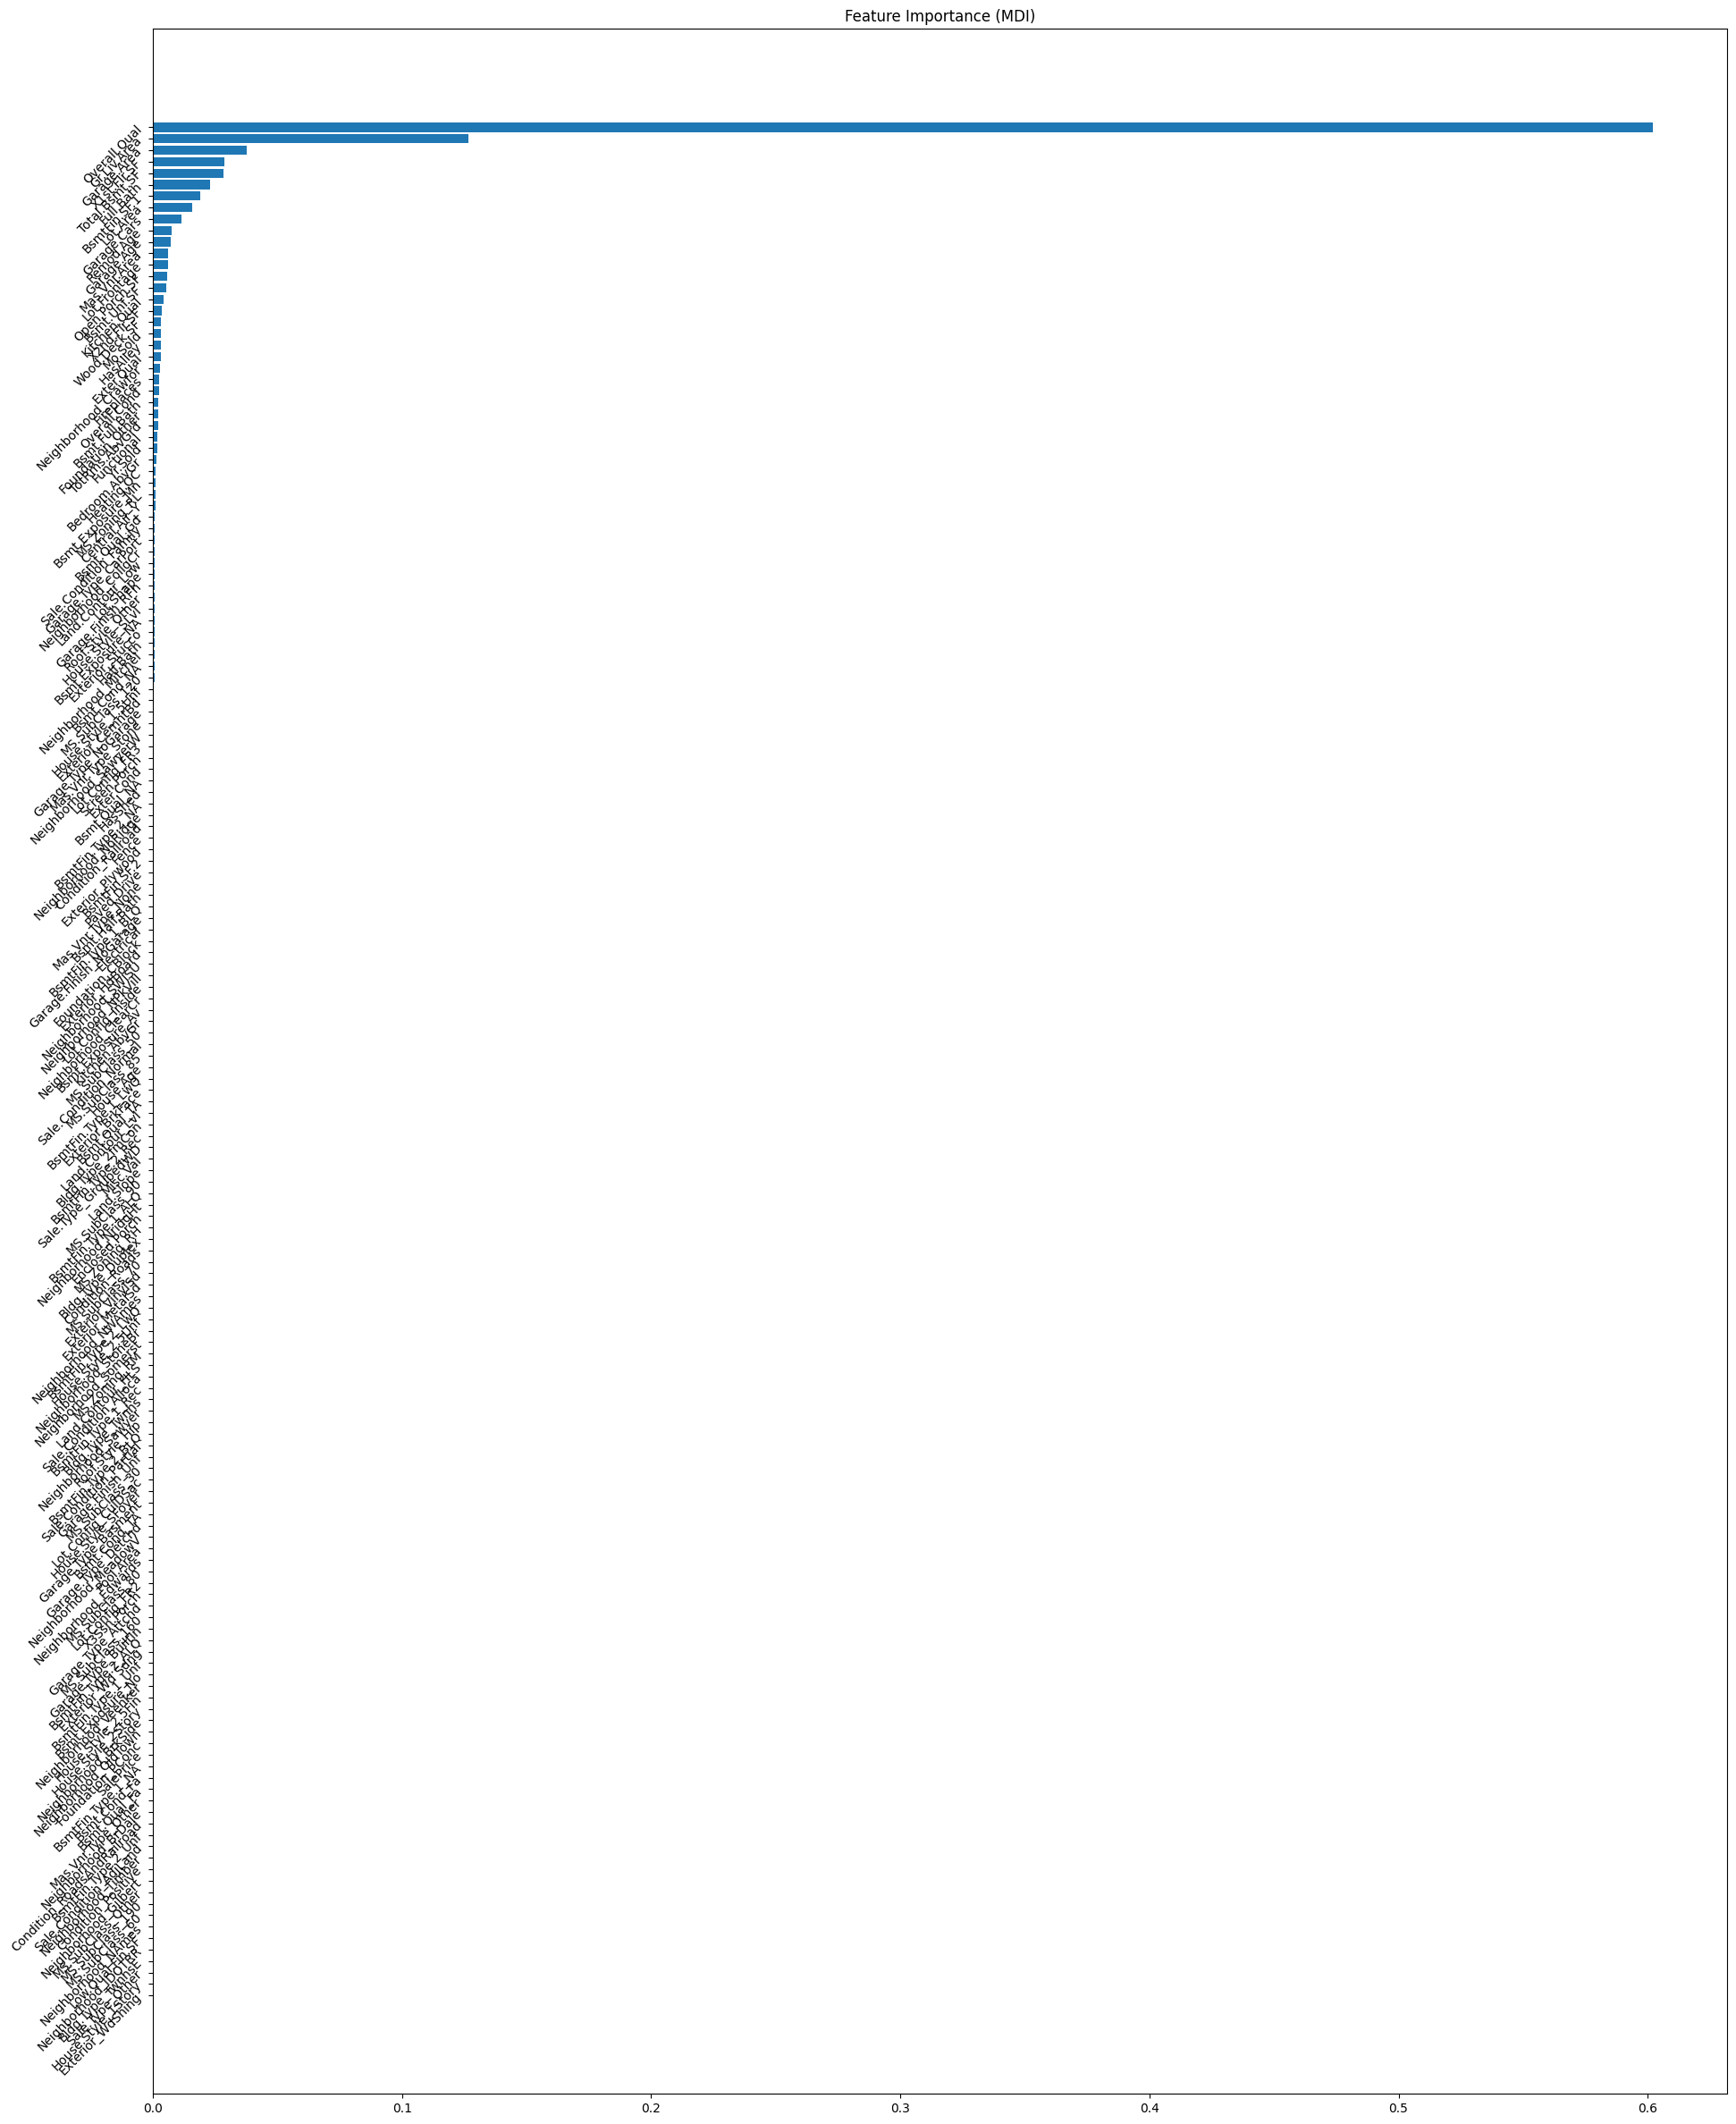

In [44]:
import matplotlib.pyplot as plt


feature_importance_forest = forest_reg.feature_importances_
sorted_idx = np.argsort(feature_importance_forest)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_forest[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")

Text(0.5, 1.0, 'Feature Importance (MDI)')

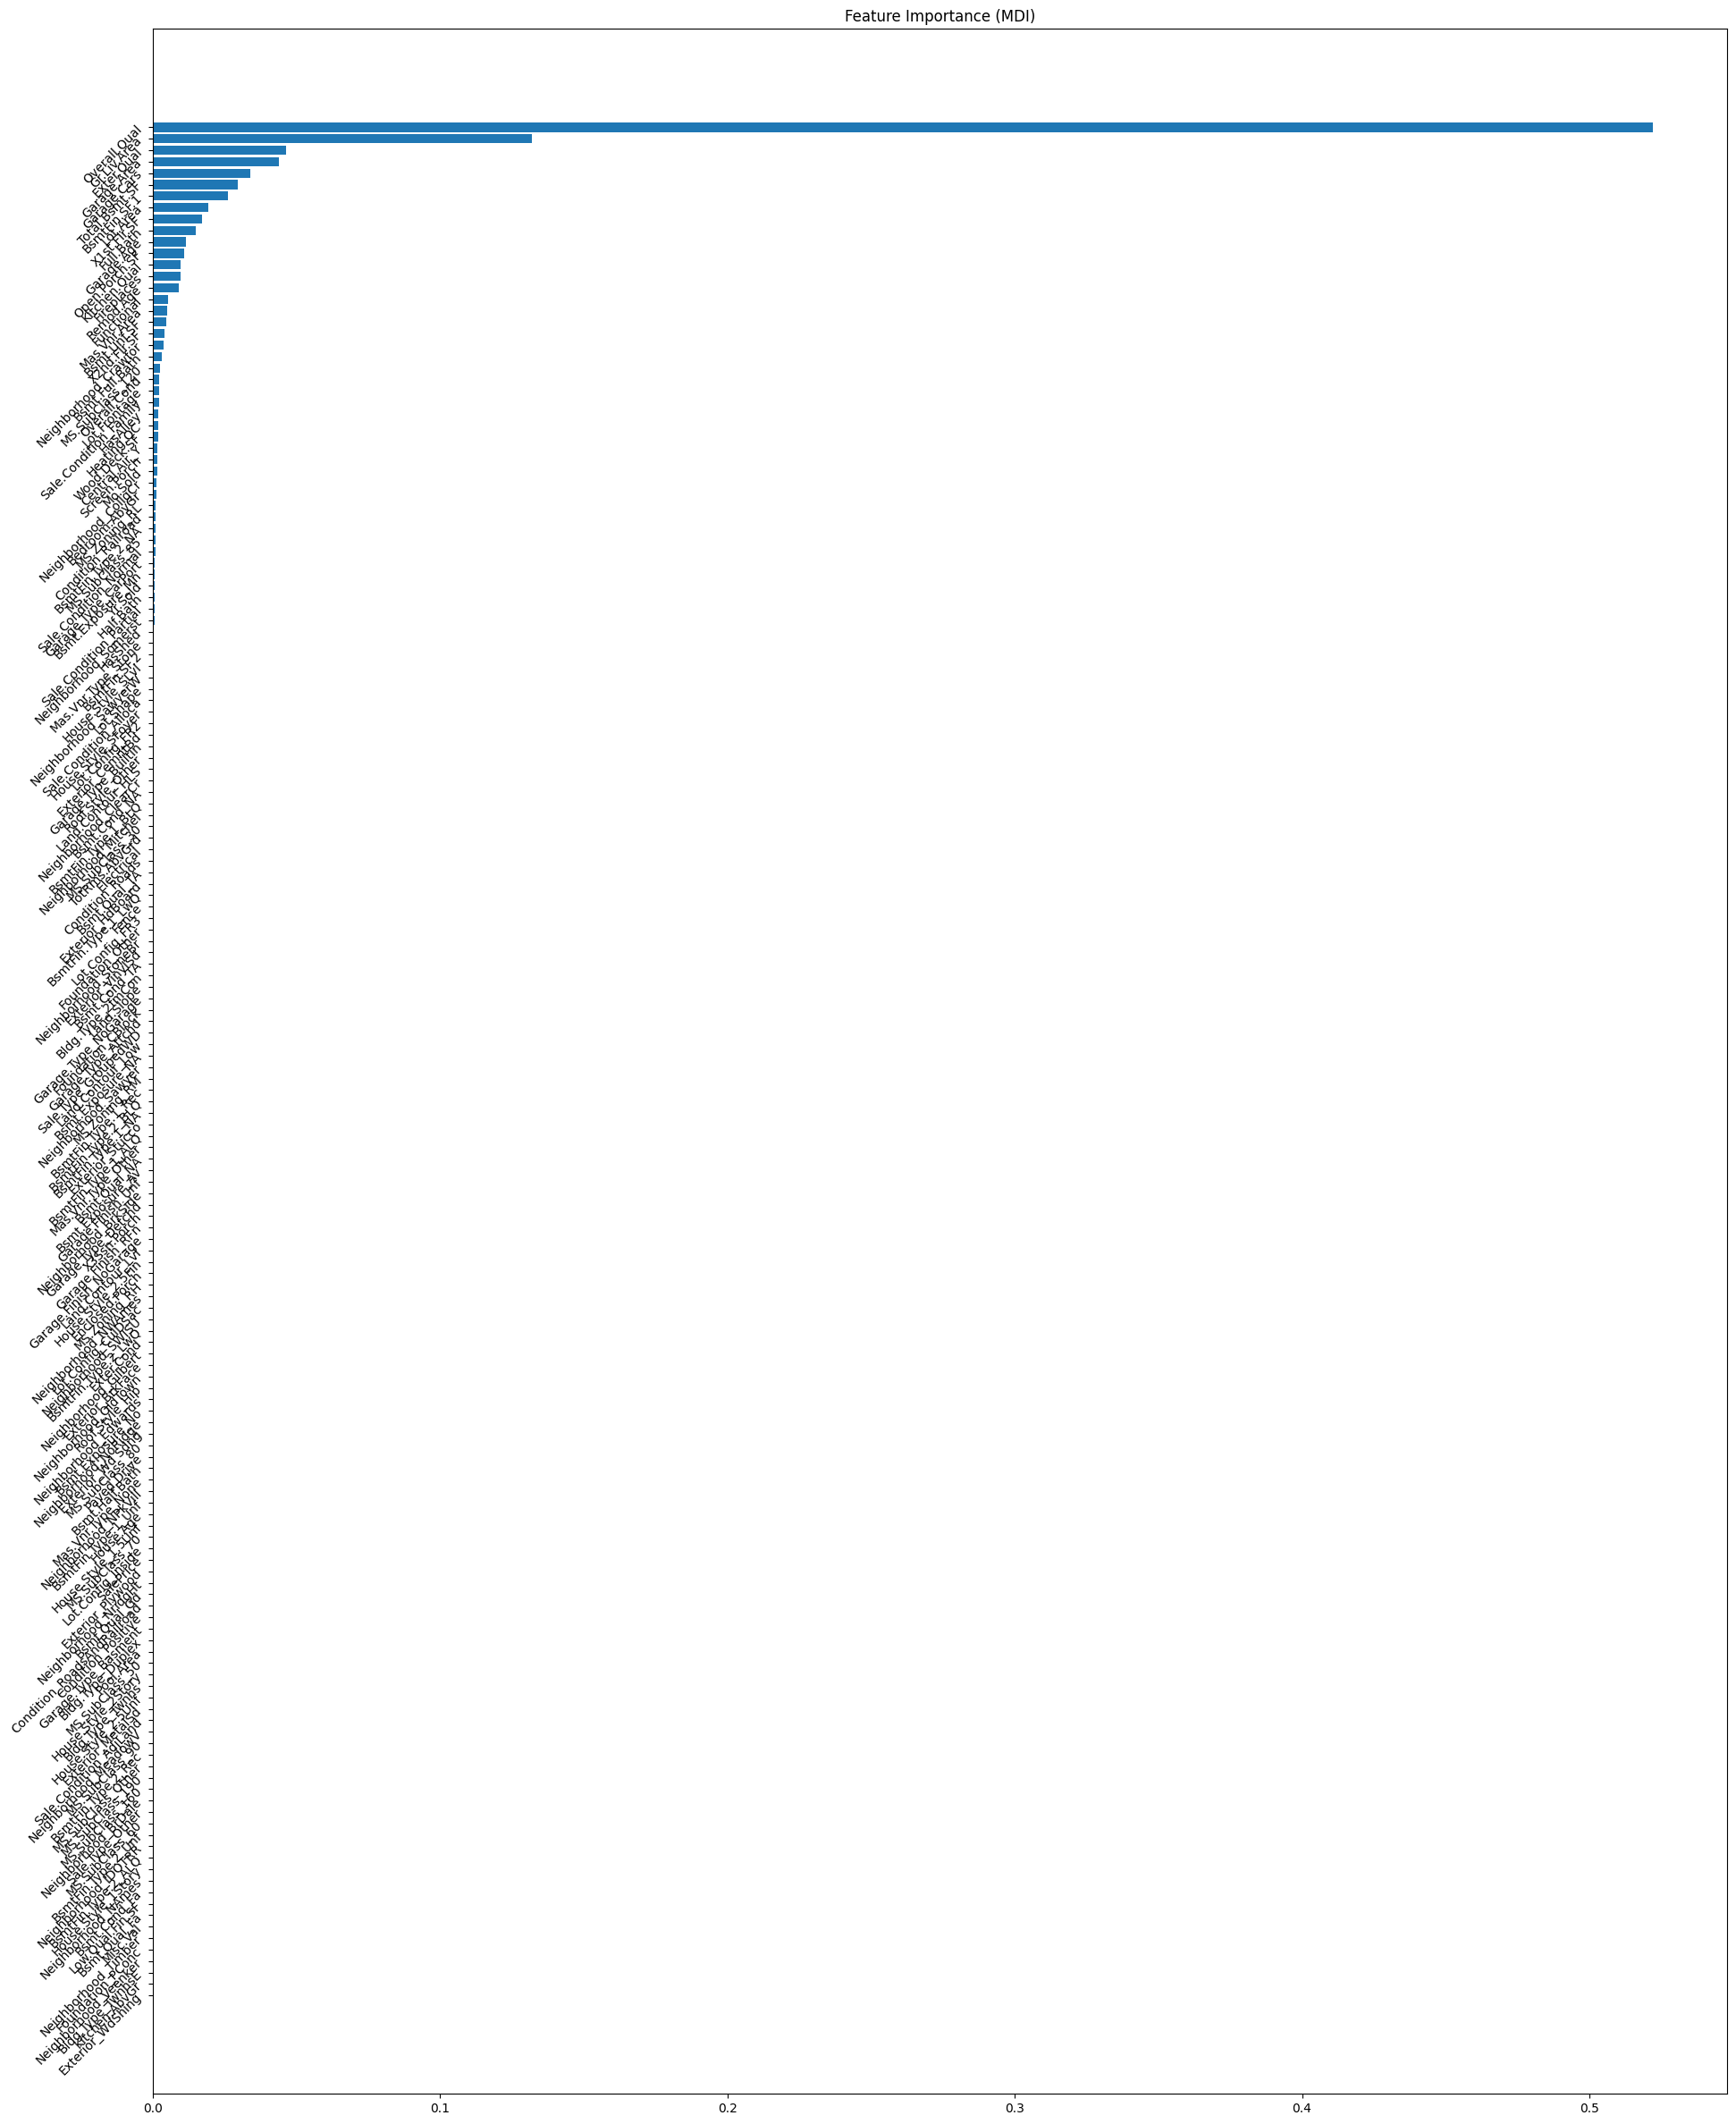

In [45]:
feature_importance_gbr = gbr_reg.feature_importances_
sorted_idx = np.argsort(feature_importance_gbr)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_gbr[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")

Text(0.5, 1.0, 'Feature Importance (MDI)')

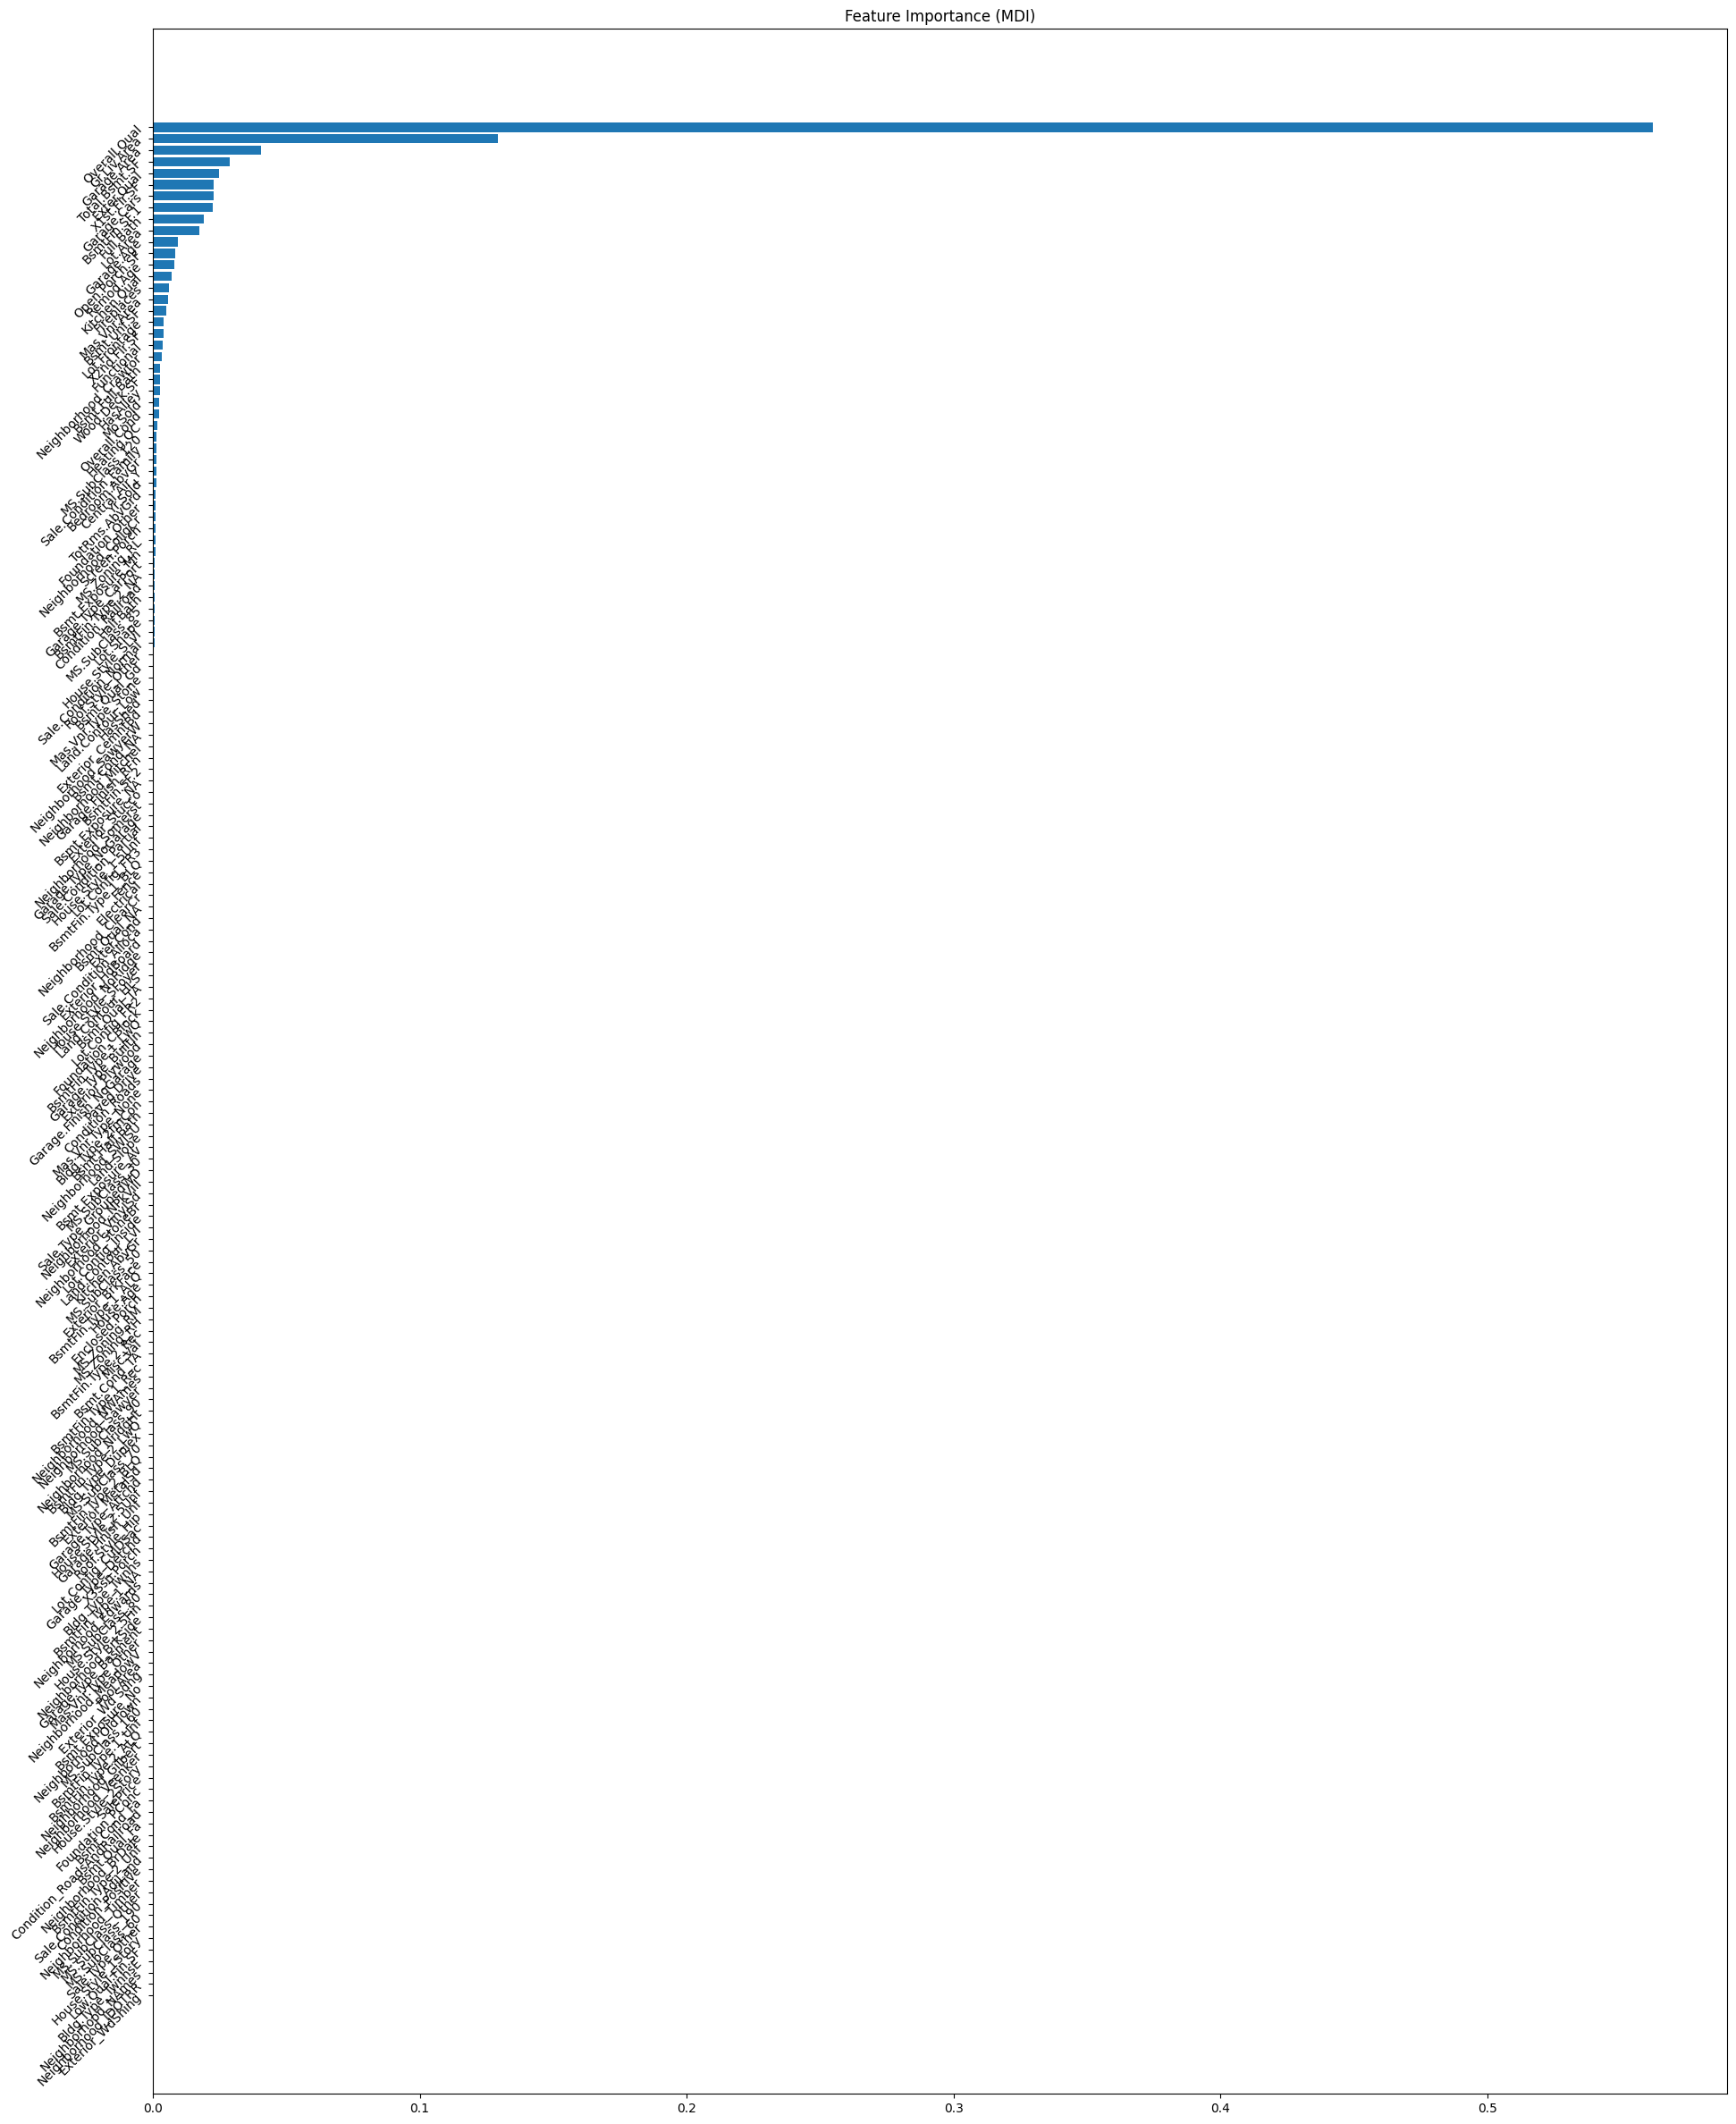

In [46]:
# Faz a média da importância das features
feature_importance = (feature_importance_forest + feature_importance_gbr) / 2
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")



In [47]:
# Filtra as 10 features mais importantes
top_15_features = np.array(model_data.columns)[sorted_idx][-15:]
top_15_features


array(['Fireplaces', 'Kitchen.Qual', 'Remod.Age', 'Open.Porch.SF',
       'Garage.Age', 'Lot.Area', 'Full.Bath', 'BsmtFin.SF.1',
       'Garage.Cars', 'X1st.Flr.SF', 'Exter.Qual', 'Total.Bsmt.SF',
       'Garage.Area', 'Gr.Liv.Area', 'Overall.Qual'], dtype=object)

In [48]:
# print the 15 most important features and their importance score
print('Feature Importance Score')
print('------------------------')
for i,v in enumerate(feature_importance[sorted_idx][-15:]):
    print(f'Feature: {top_15_features[i]}, Score: {v}')
    

Feature Importance Score
------------------------
Feature: Fireplaces, Score: 0.006085449714413234
Feature: Kitchen.Qual, Score: 0.00701518734395414
Feature: Remod.Age, Score: 0.00815396889121747
Feature: Open.Porch.SF, Score: 0.008320781118195772
Feature: Garage.Age, Score: 0.00936965196567225
Feature: Lot.Area, Score: 0.017508735704728728
Feature: Full.Bath, Score: 0.018947155676237767
Feature: BsmtFin.SF.1, Score: 0.022569653333066042
Feature: Garage.Cars, Score: 0.02267678610851173
Feature: X1st.Flr.SF, Score: 0.02290609336205906
Feature: Exter.Qual, Score: 0.02480633003068683
Feature: Total.Bsmt.SF, Score: 0.02887964436146808
Feature: Garage.Area, Score: 0.04065433286185936
Feature: Gr.Liv.Area, Score: 0.1293008462660114
Feature: Overall.Qual, Score: 0.5619471239098961


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


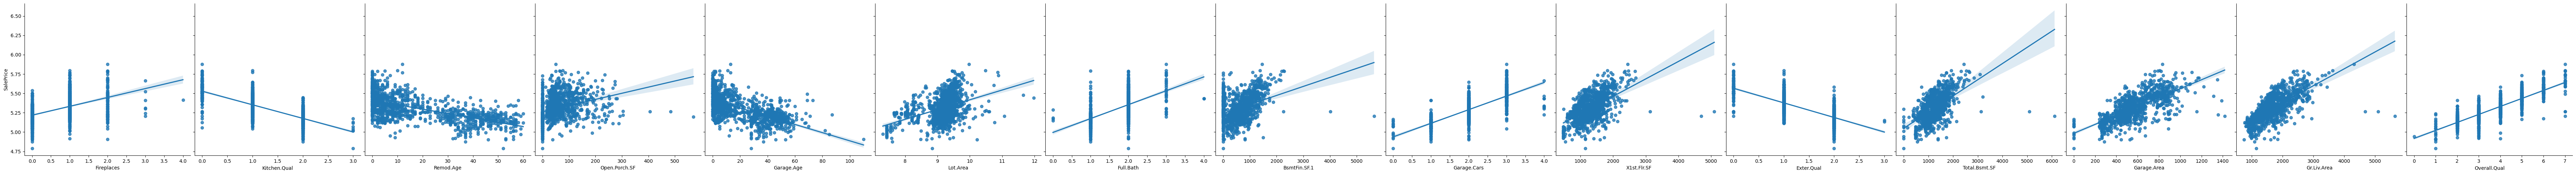

In [49]:
# faz o gráfico de dispersão das 15 features mais importantes
import seaborn as sns

sns.pairplot(model_data, x_vars=top_15_features, y_vars='SalePrice', height=5, aspect=1, kind='reg')


In [50]:
# cria um dataframe com as 10 features mais importantes
top_15_features_df = model_data[top_15_features].copy()
top_15_features_df.head()

# cria um dataframe com as 10 features mais importantes e o target
top_15_features_df = model_data[top_15_features].copy()
top_15_features_df['SalePrice'] = model_data['SalePrice'].copy()
top_15_features_df.corr()


,Fireplaces,Kitchen.Qual,Remod.Age,Open.Porch.SF,Garage.Age,Lot.Area,Full.Bath,BsmtFin.SF.1,Garage.Cars,X1st.Flr.SF,Exter.Qual,Total.Bsmt.SF,Garage.Area,Gr.Liv.Area,Overall.Qual,SalePrice
Fireplaces,1.000000,-0.213314,-0.094401,0.163050,-0.017007,0.368566,0.190709,0.267094,0.295256,0.423584,-0.203238,0.322233,0.309936,0.448689,0.312112,0.442013
Kitchen.Qual,-0.213314,1.000000,0.685026,-0.233711,0.652295,-0.139978,-0.417115,-0.260268,-0.540805,-0.401652,0.782364,-0.455033,-0.526588,-0.452143,-0.746551,-0.723308
Remod.Age,-0.094401,0.685026,1.000000,-0.231975,0.847372,0.018150,-0.509303,-0.130663,-0.531764,-0.254393,0.698310,-0.310767,-0.454472,-0.327383,-0.663694,-0.614362
Open.Porch.SF,0.163050,-0.233711,-0.231975,1.000000,-0.204303,0.237667,0.241727,0.159732,0.225352,0.257324,-0.236654,0.256528,0.261365,0.366281,0.266082,0.306571
Garage.Age,-0.017007,0.652295,0.847372,-0.204303,1.000000,0.089621,-0.538570,-0.130023,-0.589690,-0.246860,0.720825,-0.354866,-0.511093,-0.310726,-0.694978,-0.611659
Lot.Area,0.368566,-0.139978,0.018150,0.237667,0.089621,1.000000,0.176127,0.233018,0.302063,0.481063,-0.095123,0.402311,0.389631,0.435390,0.195007,0.408279
Full.Bath,0.190709,-0.417115,-0.509303,0.241727,-0.538570,0.176127,1.000000,0.047895,0.499384,0.316831,-0.442787,0.307355,0.398054,0.585956,0.529336,0.562066
BsmtFin.SF.1,0.267094,-0.260268,-0.130663,0.159732,-0.130023,0.233018,0.047895,1.000000,0.213849,0.469394,-0.247759,0.524424,0.301698,0.244617,0.264098,0.360454
Garage.Cars,0.295256,-0.540805,-0.531764,0.225352,-0.589690,0.302063,0.499384,0.213849,1.000000,0.436740,-0.554291,0.450933,0.863198,0.540429,0.643923,0.730184
X1st.Flr.SF,0.423584,-0.401652,-0.254393,0.257324,-0.246860,0.481063,0.316831,0.469394,0.436740,1.000000,-0.412905,0.876817,0.526218,0.524376,0.496285,0.567950


In [51]:
# # feature engineering
# # cria uma nova feature com a soma das 15 features mais importantes
# top_15_features_df['sum_15_features'] = top_15_features_df[top_15_features].sum(axis=1)
# top_15_features_df.head()

In [52]:
# correlação da nova feature com o target
top_15_features_df.corr()


,Fireplaces,Kitchen.Qual,Remod.Age,Open.Porch.SF,Garage.Age,Lot.Area,Full.Bath,BsmtFin.SF.1,Garage.Cars,X1st.Flr.SF,Exter.Qual,Total.Bsmt.SF,Garage.Area,Gr.Liv.Area,Overall.Qual,SalePrice
Fireplaces,1.000000,-0.213314,-0.094401,0.163050,-0.017007,0.368566,0.190709,0.267094,0.295256,0.423584,-0.203238,0.322233,0.309936,0.448689,0.312112,0.442013
Kitchen.Qual,-0.213314,1.000000,0.685026,-0.233711,0.652295,-0.139978,-0.417115,-0.260268,-0.540805,-0.401652,0.782364,-0.455033,-0.526588,-0.452143,-0.746551,-0.723308
Remod.Age,-0.094401,0.685026,1.000000,-0.231975,0.847372,0.018150,-0.509303,-0.130663,-0.531764,-0.254393,0.698310,-0.310767,-0.454472,-0.327383,-0.663694,-0.614362
Open.Porch.SF,0.163050,-0.233711,-0.231975,1.000000,-0.204303,0.237667,0.241727,0.159732,0.225352,0.257324,-0.236654,0.256528,0.261365,0.366281,0.266082,0.306571
Garage.Age,-0.017007,0.652295,0.847372,-0.204303,1.000000,0.089621,-0.538570,-0.130023,-0.589690,-0.246860,0.720825,-0.354866,-0.511093,-0.310726,-0.694978,-0.611659
Lot.Area,0.368566,-0.139978,0.018150,0.237667,0.089621,1.000000,0.176127,0.233018,0.302063,0.481063,-0.095123,0.402311,0.389631,0.435390,0.195007,0.408279
Full.Bath,0.190709,-0.417115,-0.509303,0.241727,-0.538570,0.176127,1.000000,0.047895,0.499384,0.316831,-0.442787,0.307355,0.398054,0.585956,0.529336,0.562066
BsmtFin.SF.1,0.267094,-0.260268,-0.130663,0.159732,-0.130023,0.233018,0.047895,1.000000,0.213849,0.469394,-0.247759,0.524424,0.301698,0.244617,0.264098,0.360454
Garage.Cars,0.295256,-0.540805,-0.531764,0.225352,-0.589690,0.302063,0.499384,0.213849,1.000000,0.436740,-0.554291,0.450933,0.863198,0.540429,0.643923,0.730184
X1st.Flr.SF,0.423584,-0.401652,-0.254393,0.257324,-0.246860,0.481063,0.316831,0.469394,0.436740,1.000000,-0.412905,0.876817,0.526218,0.524376,0.496285,0.567950


# Teste das alterações

In [53]:
# train test split
X = top_15_features_df.drop(columns=['SalePrice']).copy()
y = top_15_features_df['SalePrice'].copy()

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)

In [54]:
# testa o modelo de stacking regressor só com as 15 features mais importantes e a nova feature criada

stack_reg_scores = cross_val_score(stack_reg, Xtrain2, ytrain2,
                                      scoring="neg_mean_squared_error", cv=8, n_jobs=-1)    
stack_reg_rmse_scores = np.sqrt(-stack_reg_scores)

print(stack_reg_rmse_scores)
print(stack_reg_rmse_scores.mean())

[0.05492599 0.04794863 0.06333156 0.04481943 0.05554246 0.04590712
 0.04982009 0.06170933]
0.053000577049584774


In [55]:
# converte o resultado para o valor original
mean_scores = stack_reg_rmse_scores.mean()
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

12.979741584014803


# Analisando Correlações + Features
Inicialmente utilizamos o RandomForest e DecisionTree buscar entender como um modelo complexo interage com nosso banco de dados. Com os benchmarks feitos, buscamos outras formas e modelos que pudessemos implementar, que reduzissem a porcentagem de erro. Com isso chegamos no StakingRegressor em que utilizamos três regressores em formato de stack.

```python
estimators = [
    ('rf', forest_reg),
    ('ls', lasso_reg),
    ('gb', gbr_reg)    
]
```

Após plotar o gráfico das importâncias médias das features, percebemos que apenas 10 features estavam ditando o resultado do modelo. Para solucionar isso, agora daremos inicio a mais uma rodada, adicional a realizada no documento <b>02_analysis_and_preprocessing</b> buscando correlações entre duas ou mais features que poderiam ser múltiplicadas.

## Quais são as 10 Features que ditam o modelo?

1. Lot.Area
2. Exter.Qual
3. BsmtFin.SF.2
4. Overall.Cond
5. Heating.QC
6. Land.Slope
7. Mas.Vn.Area
8. Bsmt.Unf.SF
9. Overall.Qual
10. Exter.Cond



In [58]:
# Testa o modelo de stacking regressor com o conjunto de teste
stack_reg.fit(Xtrain2, ytrain2)
y_pred = stack_reg.predict(Xtest)
RMSE = np.sqrt(mean_squared_error(y_pred, ytest))

print(f'Stacking Regressor:')
print(f'RMSE: {RMSE}')


KeyboardInterrupt: 

In [ ]:
# converte o resultado para o valor original
RMSE = (10**RMSE - 1) * 100
print(f'RMSE: {RMSE}')

RMSE: 13.348439805853939


In [ ]:
stack_reg

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=900,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ls', Lasso(alpha=0.1, random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=600,
                                                         random_state=42))],
                  final_estimator=Ridge())

In [59]:
stack_reg_final = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)
# Training with all data
stack_reg_final.fit(X, y)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=900,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ls', Lasso(alpha=0.1, random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=600,
                                                         random_state=42))],
                  final_estimator=Ridge())

In [ ]:
pickle_model = open("stack_reg.pkl","wb")
pickle.dump(stack_reg, pickle_model)
pickle_model.close()

In [ ]:
# stack_reg inputs
X.columns


Index(['Fireplaces', 'Kitchen.Qual', 'Remod.Age', 'Open.Porch.SF',
       'Garage.Age', 'Lot.Area', 'Full.Bath', 'BsmtFin.SF.1', 'Garage.Cars',
       'X1st.Flr.SF', 'Exter.Qual', 'Total.Bsmt.SF', 'Garage.Area',
       'Gr.Liv.Area', 'Overall.Qual'],
      dtype='object')